<a href="https://colab.research.google.com/github/deepu-san/Tasks/blob/main/FPL/FPL_Analytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import math
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Given Data

In [ ]:
path="https://github.com/deepu-san/Tasks/blob/main/FPL/fplAnalytics-playerStautsData%20fin.xlsx?raw=true"
df=pd.read_excel(path)

In [ ]:
df.shape

(517, 10)

In [ ]:
df.isna().sum()

fplAnalytics-playerStautsData    0
Unnamed: 1                       0
Unnamed: 2                       0
Unnamed: 3                       0
Unnamed: 4                       0
Unnamed: 5                       0
Unnamed: 6                       0
Unnamed: 7                       0
Unnamed: 8                       0
Unnamed: 9                       0
dtype: int64

In [ ]:
df.head()

,fplAnalytics-playerStautsData,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9
0,name,team,position,cost,status,minutes,total_points,bonus,points_per_game,selected_by_percent
1,Cédric,ARS,DEF,4.5,Available,1481,48,3,2.3,0.3
2,Leno,ARS,GKP,4.5,Available,360,10,0,2.5,0.6
3,Xhaka,ARS,MID,5,Available,2327,60,3,2.2,0.4
4,Elneny,ARS,MID,4.5,Available,801,27,0,1.9,1.8


In [ ]:
df.columns = df.iloc[0] 
df = df[1:]
df.head()

,name,team,position,cost,status,minutes,total_points,bonus,points_per_game,selected_by_percent
1,Cédric,ARS,DEF,4.5,Available,1481,48,3,2.3,0.3
2,Leno,ARS,GKP,4.5,Available,360,10,0,2.5,0.6
3,Xhaka,ARS,MID,5,Available,2327,60,3,2.2,0.4
4,Elneny,ARS,MID,4.5,Available,801,27,0,1.9,1.8
5,Holding,ARS,DEF,4.5,Available,840,29,2,1.9,0.2


In [ ]:
# df.rename(columns = {'Price Change':'price_change','Ownership prct':'ownership_prct'},inplace=True)

In [ ]:
df.dtypes

0
name                   object
team                   object
position               object
cost                   object
status                 object
minutes                object
total_points           object
bonus                  object
points_per_game        object
selected_by_percent    object
dtype: object

In [ ]:
df['cost']=df['cost'].astype('float')
df['points_per_game']=df['points_per_game'].astype('float')
df['selected_by_percent']=df['selected_by_percent'].astype('float')

df['minutes']=df['minutes'].astype('int')
df['total_points']=df['total_points'].astype('int')
df['bonus']=df['bonus'].astype('int')

In [ ]:
df['games']=(df['total_points']/df['points_per_game']).round()
df['games']=df['games'].fillna(0)
df['games']=df['games'].astype('int')
df

,name,team,position,cost,status,minutes,total_points,bonus,points_per_game,selected_by_percent,games
1,Cédric,ARS,DEF,4.5,Available,1481,48,3,2.3,0.3,21
2,Leno,ARS,GKP,4.5,Available,360,10,0,2.5,0.6,4
3,Xhaka,ARS,MID,5.0,Available,2327,60,3,2.2,0.4,27
4,Elneny,ARS,MID,4.5,Available,801,27,0,1.9,1.8,14
5,Holding,ARS,DEF,4.5,Available,840,29,2,1.9,0.2,15
...,...,...,...,...,...,...,...,...,...,...,...
512,Šarkić,WOL,GKP,4.0,Available,0,0,0,0.0,3.1,0
513,Gibbs-White,WOL,MID,5.5,Available,7,1,0,0.5,0.3,2
514,Mosquera,WOL,DEF,4.0,Available,0,0,0,0.0,1.1,0
515,Moutinho,WOL,MID,5.0,Available,2970,96,8,2.7,2.0,36


In [ ]:
df.dtypes

0
name                    object
team                    object
position                object
cost                   float64
status                  object
minutes                  int64
total_points             int64
bonus                    int64
points_per_game        float64
selected_by_percent    float64
games                    int64
dtype: object

In [ ]:
df['team'].value_counts()

TOT    31
LEE    29
NEW    29
LIV    29
AVL    28
ARS    28
CRY    27
SOU    27
LEI    26
CHE    26
BHA    26
MCI    26
BRE    25
NFO    25
EVE    24
MUN    23
WOL    23
FUL    22
BOU    22
WHU    20
Name: team, dtype: int64

In [ ]:
df.describe()

,cost,minutes,total_points,bonus,points_per_game,selected_by_percent,games
count,516.000000,516.000000,516.000000,516.000000,516.000000,516.000000,516.000000
mean,5.158915,1184.875969,51.211240,4.160853,2.125388,2.904070,16.263566
std,1.226701,1104.053947,52.500023,5.851504,1.642752,7.258351,13.474619
min,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.500000,0.000000,0.000000,0.000000,0.000000,0.200000,0.000000
50%,5.000000,997.500000,38.000000,2.000000,2.200000,0.500000,17.500000
75%,5.500000,2110.500000,88.000000,7.000000,3.200000,2.100000,29.000000
max,13.000000,3420.000000,265.000000,33.000000,7.900000,63.400000,38.000000


In [ ]:
df[df.duplicated()]

,name,team,position,cost,status,minutes,total_points,bonus,points_per_game,selected_by_percent,games


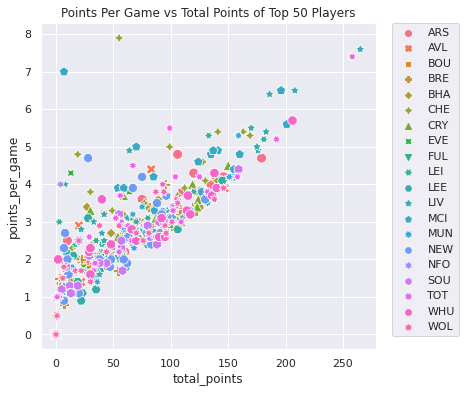

In [ ]:
sns.set(rc={"figure.figsize":(6,6)})
sns.scatterplot(data=df,x='total_points',y='points_per_game',hue="team",style="team", s = 100)  #.nlargest(50, 'total_points')
plt.title("Points Per Game vs Total Points of Top 50 Players")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
#plt.figsize=(100, 6)
#fig, ax = plt.figsize=(16,15)

# My Data


In [ ]:
path2="https://github.com/deepu-san/Tasks/blob/main/FPL/FPL%2021_22%20Data.xlsx?raw=true"
df=pd.read_excel(path2)

In [ ]:
df.head()

,name,team,position,minutes,goals,assists,CS,ppg,total_points,bonus,price,Price Change,Ownership prct
0,A.Armstrong,SOU,FWD,1409.0,2.0,3.0,4.0,2.5,57.0,3.0,57.0,-3.0,1.4
1,Aarons,NOR,DEF,2879.0,0.0,2.0,4.0,1.6,55.0,2.0,43.0,-2.0,0.9
2,Abraham,CHE,FWD,0.0,0.0,0.0,0.0,0.0,0.0,0.0,65.0,0.0,0.1
3,Adams,SOU,FWD,2034.0,7.0,4.0,5.0,3.4,103.0,11.0,65.0,-5.0,2.6
4,Adaramola,CRY,DEF,0.0,0.0,0.0,0.0,0.0,0.0,0.0,40.0,0.0,0.0


In [ ]:
df.dtypes

name               object
team               object
position           object
minutes           float64
goals             float64
assists           float64
CS                float64
ppg               float64
total_points      float64
bonus             float64
price             float64
Price Change      float64
Ownership prct    float64
dtype: object

In [ ]:
df['minutes']=df['minutes'].astype('int')
df['goals']=df['goals'].astype('int')
df['assists']=df['assists'].astype('int')
df['CS']=df['CS'].astype('int')
df['total_points']=df['total_points'].astype('float')
df['bonus']=df['bonus'].astype('int')

In [ ]:
df['G+A']=df['goals']+df['assists']
df['price']=df['price']/10
df['Price Change']=df['Price Change']/10 

In [ ]:
df['games']=(df['total_points']/df['ppg']).round()
df.loc[df.minutes == 0, 'games'] = 0
df['games']=df['games'].fillna(0)
df['games']= df['games'].astype('int')

In [ ]:
df['points_to_price']=df['total_points']/df['price']

Text(0.51, -0.18, '◉Graph plotted for players having top 50 g+a count.\n◉The ownership % of players is denoted by the size of the marker following a gradient as shown in legend')

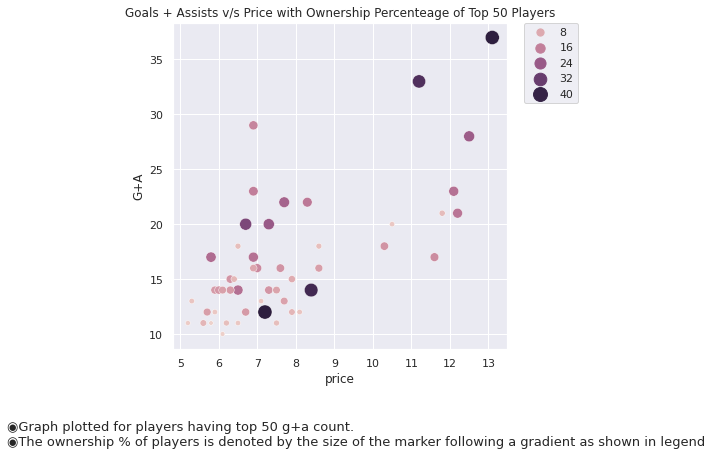

In [ ]:
sns.set(rc={"figure.figsize":(6,6)})
sns.scatterplot(data=df.nlargest(50, 'G+A'),x='price',y='G+A',hue="Ownership prct",size="Ownership prct", s = 100,sizes=(20, 200))  #.nlargest(50, 'total_points') ,style="team"
plt.title("Goals + Assists v/s Price with Ownership Percenteage of Top 50 Players")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

txt="◉Graph plotted for players having top 50 g+a count.\n◉The ownership % of players is denoted by the size of the marker following a gradient as shown in legend"
plt.text(.51, -0.18,txt, fontsize=13) 

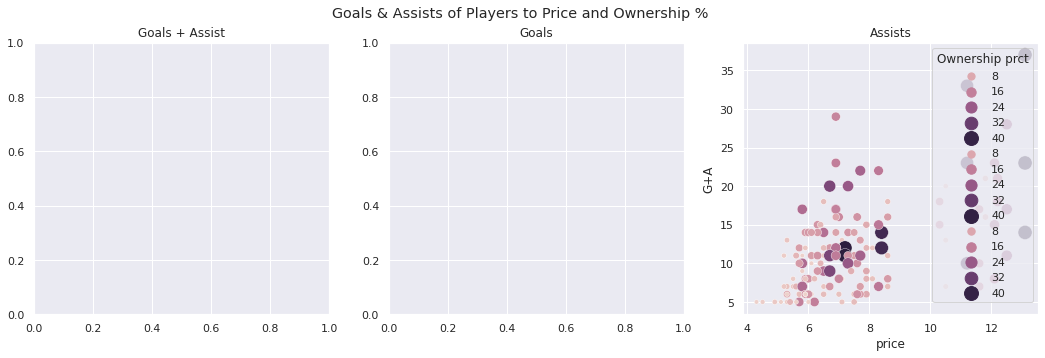

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(18,5))
fig.suptitle('Goals & Assists of Players to Price and Ownership %')

axes[0].set_title('Goals + Assist')
axes[1].set_title('Goals')
axes[2].set_title('Assists')

sns.scatterplot(data=df.nlargest(50, 'G+A'),x='price',y='G+A',hue="Ownership prct",size="Ownership prct", s = 100,sizes=(20, 200))#, ax[0])  #.nlargest(50, 'total_points') ,style="team"
sns.scatterplot(data=df.nlargest(50, 'goals'),x='price',y='goals',hue="Ownership prct",size="Ownership prct", s = 100,sizes=(20, 200))#,ax[0])  #.nlargest(50, 'total_points') ,style="team"
sns.scatterplot(data=df.nlargest(50, 'assists'),x='price',y='assists',hue="Ownership prct",size="Ownership prct", s = 100,sizes=(20, 200))#,ax[0])  #.nlargest(50, 'total_points') ,style="team"


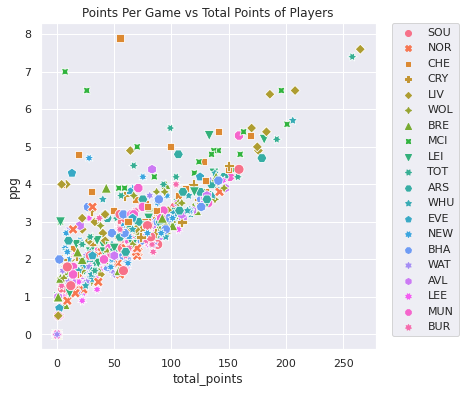

In [ ]:
sns.set(rc={"figure.figsize":(6,6)})
sns.scatterplot(data=df,x='total_points',y='ppg',hue="team",style="team", s = 100)  #.nlargest(50, 'total_points')
plt.title("Points Per Game vs Total Points of Players")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [ ]:
df2=df.loc[(df.name == 'Ronaldo') | (df.name == 'Lukaku') ]
df2

,name,team,position,minutes,goals,assists,CS,ppg,total_points,bonus,price,Price Change,Ownership prct,G+A,games,points_to_price
393,Lukaku,CHE,FWD,1583,8,1,7,3.3,87.0,12,11.4,-0.1,7.7,9,26,7.631579
564,Ronaldo,MUN,FWD,2454,18,3,8,5.3,159.0,29,12.2,-0.3,18.1,21,30,13.032787


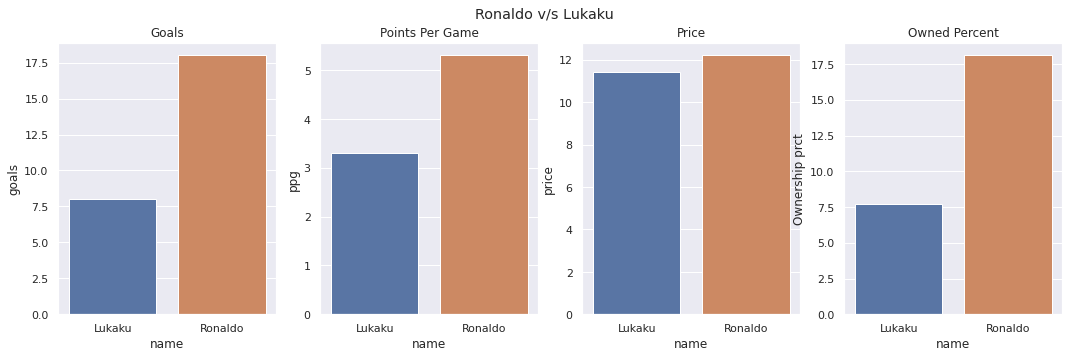

In [ ]:
fig, axes = plt.subplots(1, 4, figsize=(18,5))
fig.suptitle('Ronaldo v/s Lukaku')

axes[0].set_title('Goals')
axes[1].set_title('Points Per Game')
axes[2].set_title('Price')
axes[3].set_title('Owned Percent')

#axes[2].set_title('Area v/s Square Feet')

ax1=sns.barplot(data=df2,x='name',y='goals',ax=axes[0])  #.nlargest(50, 'total_points')
ax2=sns.barplot(x="name", y="ppg", data=df2,ax=axes[1])
ax3=sns.barplot(x="name", y="price", data=df2,ax=axes[2])
ax4=sns.barplot(x="name", y="Ownership prct", data=df2,ax=axes[3])

# ax=df.groupby("AREA")["INT_SQFT"].mean().sort_values(ascending=True).plot.bar()
# ax.set_ylabel("Average INT_SQFT")

In [ ]:
df3=df.loc[df['position']=='FWD'].groupby('team').sum().reset_index()
df3['points_to_price_ratio']=df3['total_points']/df3['price']

df4=df.loc[df['position']=='MID'].groupby('team').sum().reset_index()
df4['points_to_price_ratio']=df4['total_points']/df4['price']

df5=df.loc[df['position']=='DEF'].groupby('team').sum().reset_index()
df5['points_to_price_ratio']=df5['total_points']/df5['price']

Text(0.1, -0.18, "This graph compares total points earned to total price of players for a team at different positions.\nIn the first plot for 'Forwards', West Ham United has significantly higher ratio than other teams because Antonio is the only player listed as FWD in FPL Data.")

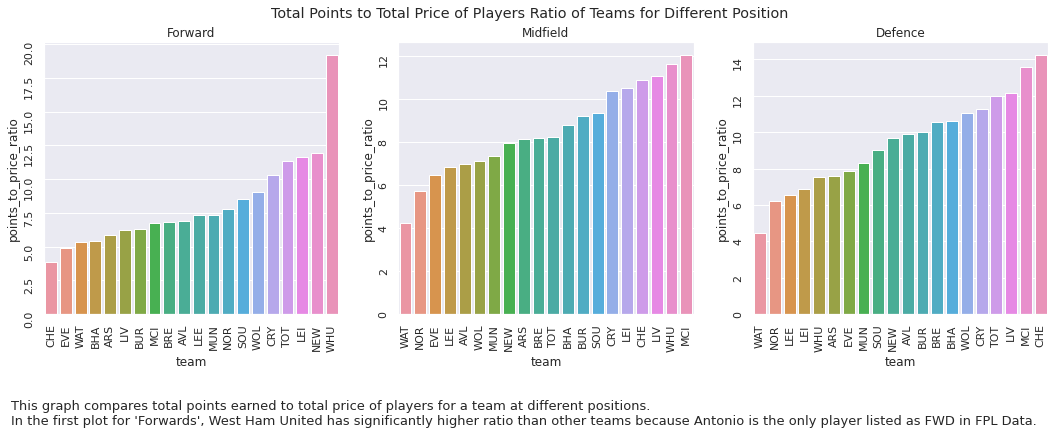

In [ ]:
#sns.set(rc={"figure.figsize":(10,5)})

fig, axes = plt.subplots(1, 3, figsize=(18,5))
fig.suptitle('Total Points to Total Price of Players Ratio of Teams for Different Position')

axes[0].set_title('Forward')
axes[1].set_title('Midfield')
axes[2].set_title('Defence')

sns.barplot(x="team", y='points_to_price_ratio', data=df3, order=df3.sort_values('points_to_price_ratio').team,ax=axes[0])

sns.barplot(x="team", y='points_to_price_ratio', data=df4, order=df4.sort_values('points_to_price_ratio').team,ax=axes[1])

sns.barplot(x="team", y='points_to_price_ratio', data=df5, order=df5.sort_values('points_to_price_ratio').team,ax=axes[2])

axes[0].tick_params(labelrotation=90)
axes[1].tick_params(labelrotation=90)
axes[2].tick_params(labelrotation=90)

txt="This graph compares total points earned to total price of players for a team at different positions.\nIn the first plot for 'Forwards', West Ham United has significantly higher ratio than other teams because Antonio is the only player listed as FWD in FPL Data."
fig.text(0.1, -0.18,txt, fontsize=13) #add text


Text(0.1, -0.25, 'This graph compares total points scored to total price of individual players at different positions, this can be considered as top 15 value for money players in each position.')

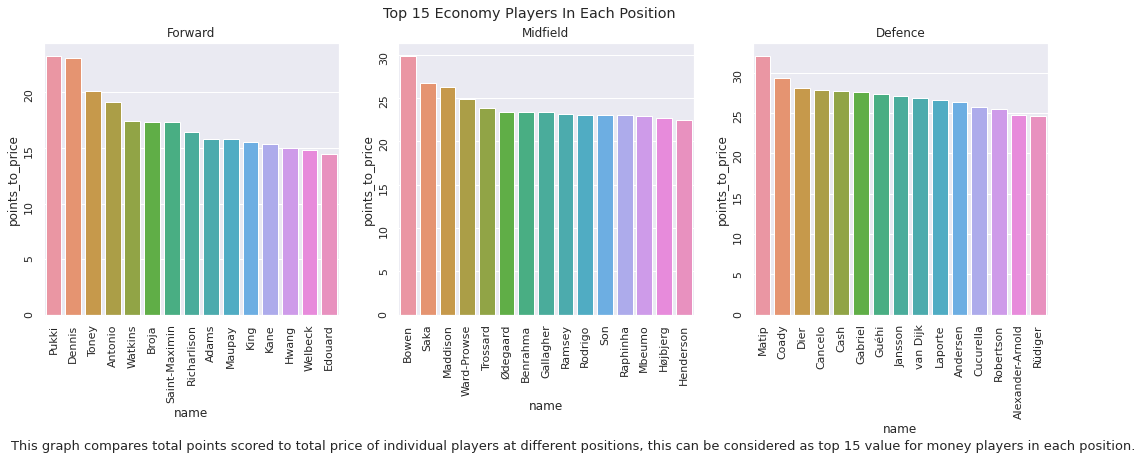

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(18,5))
fig.suptitle('Top 15 Economy Players In Each Position')

axes[0].set_title('Forward')
axes[1].set_title('Midfield')
axes[2].set_title('Defence')

sns.barplot(x="name", y='points_to_price', data=df.loc[df['position']=='FWD'].nlargest(15, 'points_to_price'),ax=axes[0]) # order=df.sort_values('points_to_price').team,

sns.barplot(x="name", y='points_to_price', data=df.loc[df['position']=='MID'].nlargest(15, 'points_to_price'),ax=axes[1]) # order=df.sort_values('points_to_price').team,

sns.barplot(x="name", y='points_to_price', data=df.loc[df['position']=='DEF'].nlargest(15, 'points_to_price'),ax=axes[2]) # order=df.sort_values('points_to_price').team,

axes[0].tick_params(labelrotation=90)
axes[1].tick_params(labelrotation=90)
axes[2].tick_params(labelrotation=90)

#fig.text(0.5, -0.3,'Text Here', fontsize=13) #add text
txt="This graph compares total points scored to total price of individual players at different positions, this can be considered as top 15 value for money players in each position."
fig.text(0.1, -0.25,txt, fontsize=13) #add text

In [ ]:
df2=df.loc[(df.name == 'Alexander-Arnold') | (df.name == 'Cancelo') | (df.name == 'Rüdiger') | (df.name == 'Cash') | (df.name == 'Gabriel') ]
df2

,name,team,position,minutes,goals,assists,CS,ppg,total_points,bonus,price,Price Change,Ownership prct,G+A,games,points_to_price
13,Alexander-Arnold,LIV,DEF,2853,2,12,18,6.5,208.0,32,8.4,0.9,37.9,14,32,24.761905
95,Cancelo,MCI,DEF,3227,1,11,19,5.6,201.0,27,7.2,1.2,41.4,12,36,27.916667
99,Cash,AVL,DEF,3377,4,3,13,3.9,147.0,11,5.3,0.3,11.5,7,38,27.735849
231,Gabriel,ARS,DEF,3063,5,0,13,4.2,146.0,16,5.3,0.3,7.4,5,35,27.547170
572,Rüdiger,CHE,DEF,3035,3,3,15,4.4,150.0,10,6.1,0.6,18.8,6,34,24.590164


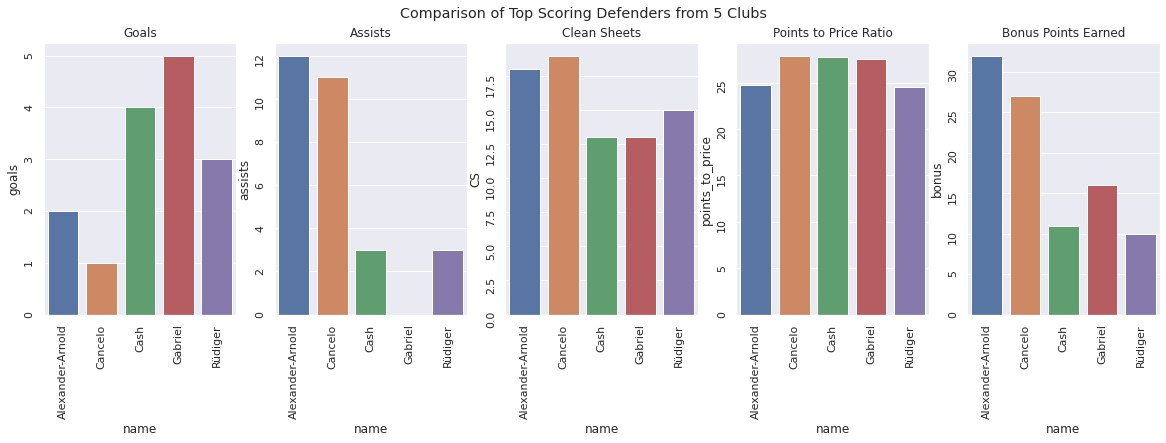

In [ ]:
fig, axes = plt.subplots(1,5, figsize=(20,5))
fig.suptitle('Comparison of Top Scoring Defenders from 5 Clubs')

axes[0].set_title('Goals')
axes[1].set_title('Assists')
axes[2].set_title('Clean Sheets')
axes[3].set_title('Points to Price Ratio')
axes[4].set_title('Bonus Points Earned')

#axes[2].set_title('Area v/s Square Feet')

ax1=sns.barplot(data=df2,x='name',y='goals',ax=axes[0])  #.nlargest(50, 'total_points')
ax2=sns.barplot(x="name", y="assists", data=df2,ax=axes[1])
ax3=sns.barplot(x="name", y="CS", data=df2,ax=axes[2])
ax4=sns.barplot(x="name", y="points_to_price", data=df2,ax=axes[3])
ax5=sns.barplot(x="name", y="bonus", data=df2,ax=axes[4])

axes[0].tick_params(labelrotation=90)
axes[1].tick_params(labelrotation=90)
axes[2].tick_params(labelrotation=90)
axes[3].tick_params(labelrotation=90)
axes[4].tick_params(labelrotation=90)


In [ ]:
df.head(0)

,name,team,position,minutes,goals,assists,CS,ppg,total_points,bonus,price,Price Change,Ownership prct,G+A,games,points_to_price


In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(15,5))
fig.suptitle('Kane v/s Firmino')

axes[0].set_title('Goals')
axes[1].set_title('Points Per Game')
axes[1].set_title('Price Gain')

#axes[2].set_title('Area v/s Square Feet')

ax1=sns.barplot(data=df2,x='name',y='goals',ax=axes[0])  #.nlargest(50, 'total_points')
ax2=sns.barplot(x="name", y="ppg", data=df2,ax=axes[1])
ax2=sns.barplot(x="name", y="Price Change", data=df2,ax=axes[2])

# ax=df.groupby("AREA")["INT_SQFT"].mean().sort_values(ascending=True).plot.bar()
# ax.set_ylabel("Average INT_SQFT")

In [ ]:
df.columns